Please run those two cells before running the Notebook!

As those plotting settings are standard throughout the book, we do not show them in the book every time we plot something.

In [1]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid", 
              palette="colorblind", color_codes=True, 
              rc={"figure.figsize": [12, 8]})

# Chapter 3 - Visualizing Financial Time Series

## 3.1 Basic visualization of time series data

### How to do it...

1. Import the libraries:

In [3]:
import pandas as pd 
import numpy as np
import yfinance as yf

2. Download Microsoft's stock prices from 2020 and calculate simple returns:

In [4]:
df = yf.download("MSFT",
                 start="2020-01-01", 
                 end="2020-12-31",
                 auto_adjust = False, 
                 progress=False)

df["simple_rtn"] = df["Adj Close"].pct_change()
df = df.dropna()

3. Plot the adjusted close prices:

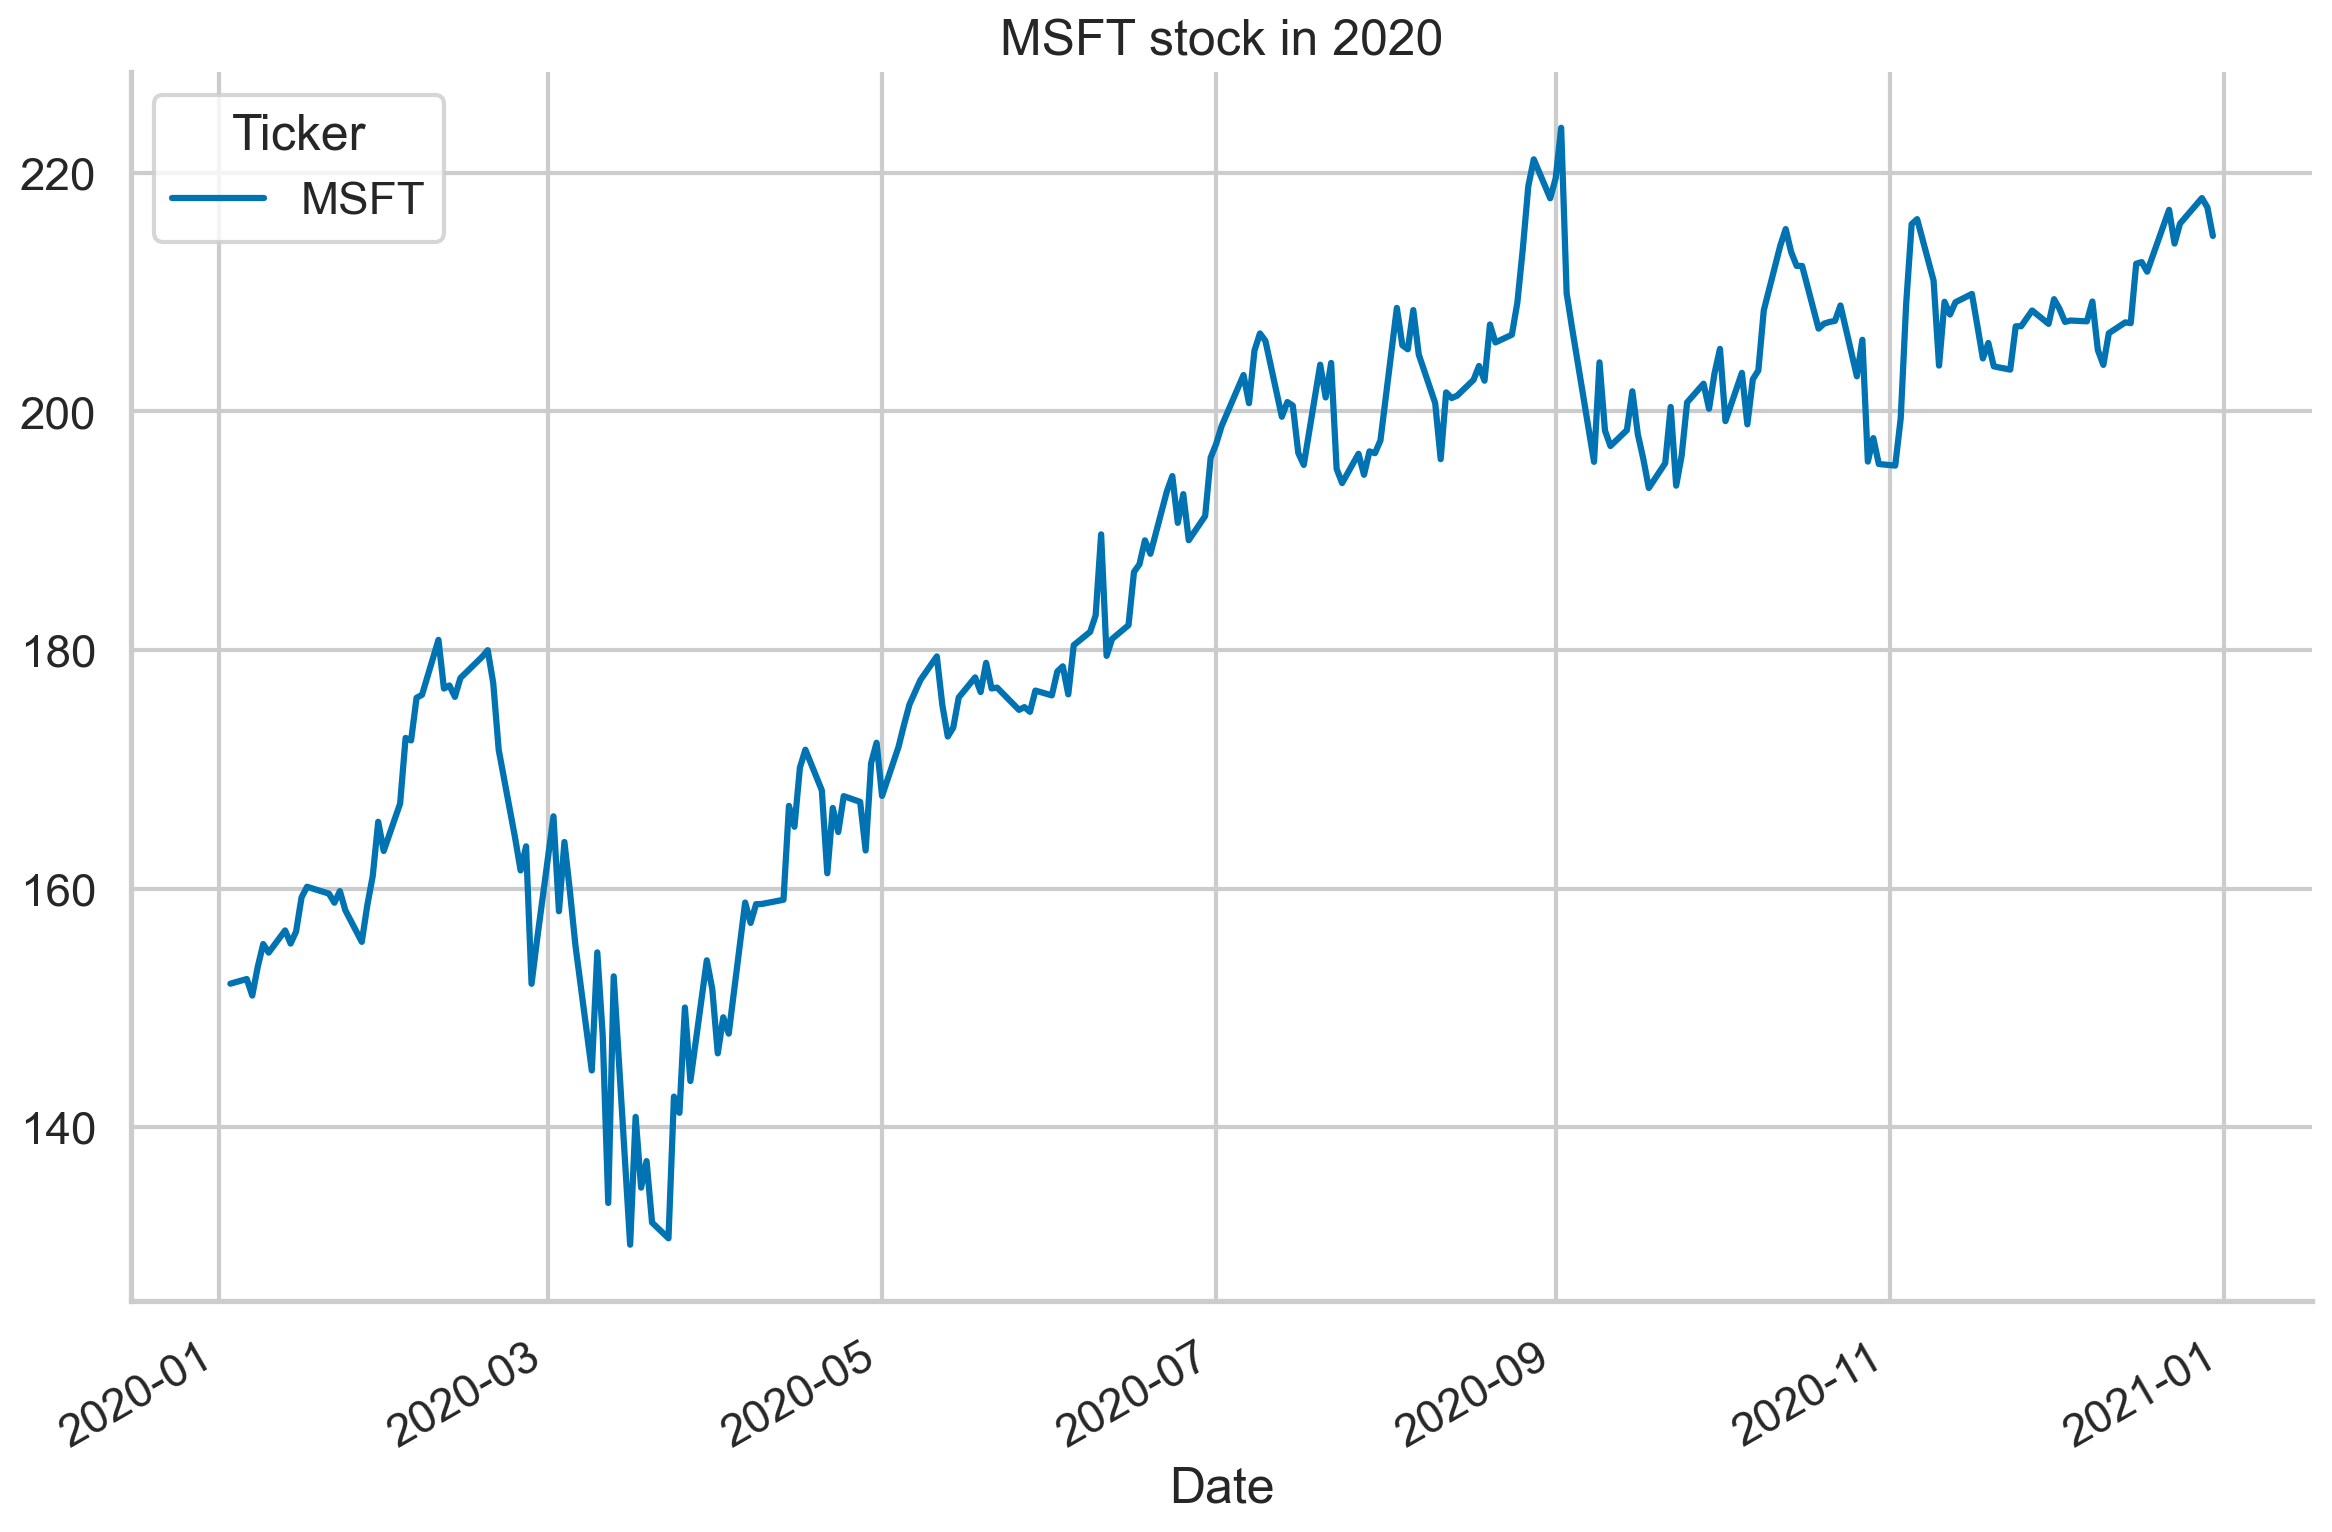

In [5]:
df["Adj Close"].plot(title="MSFT stock in 2020");

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_1', dpi=200)

It is the same as running the following:

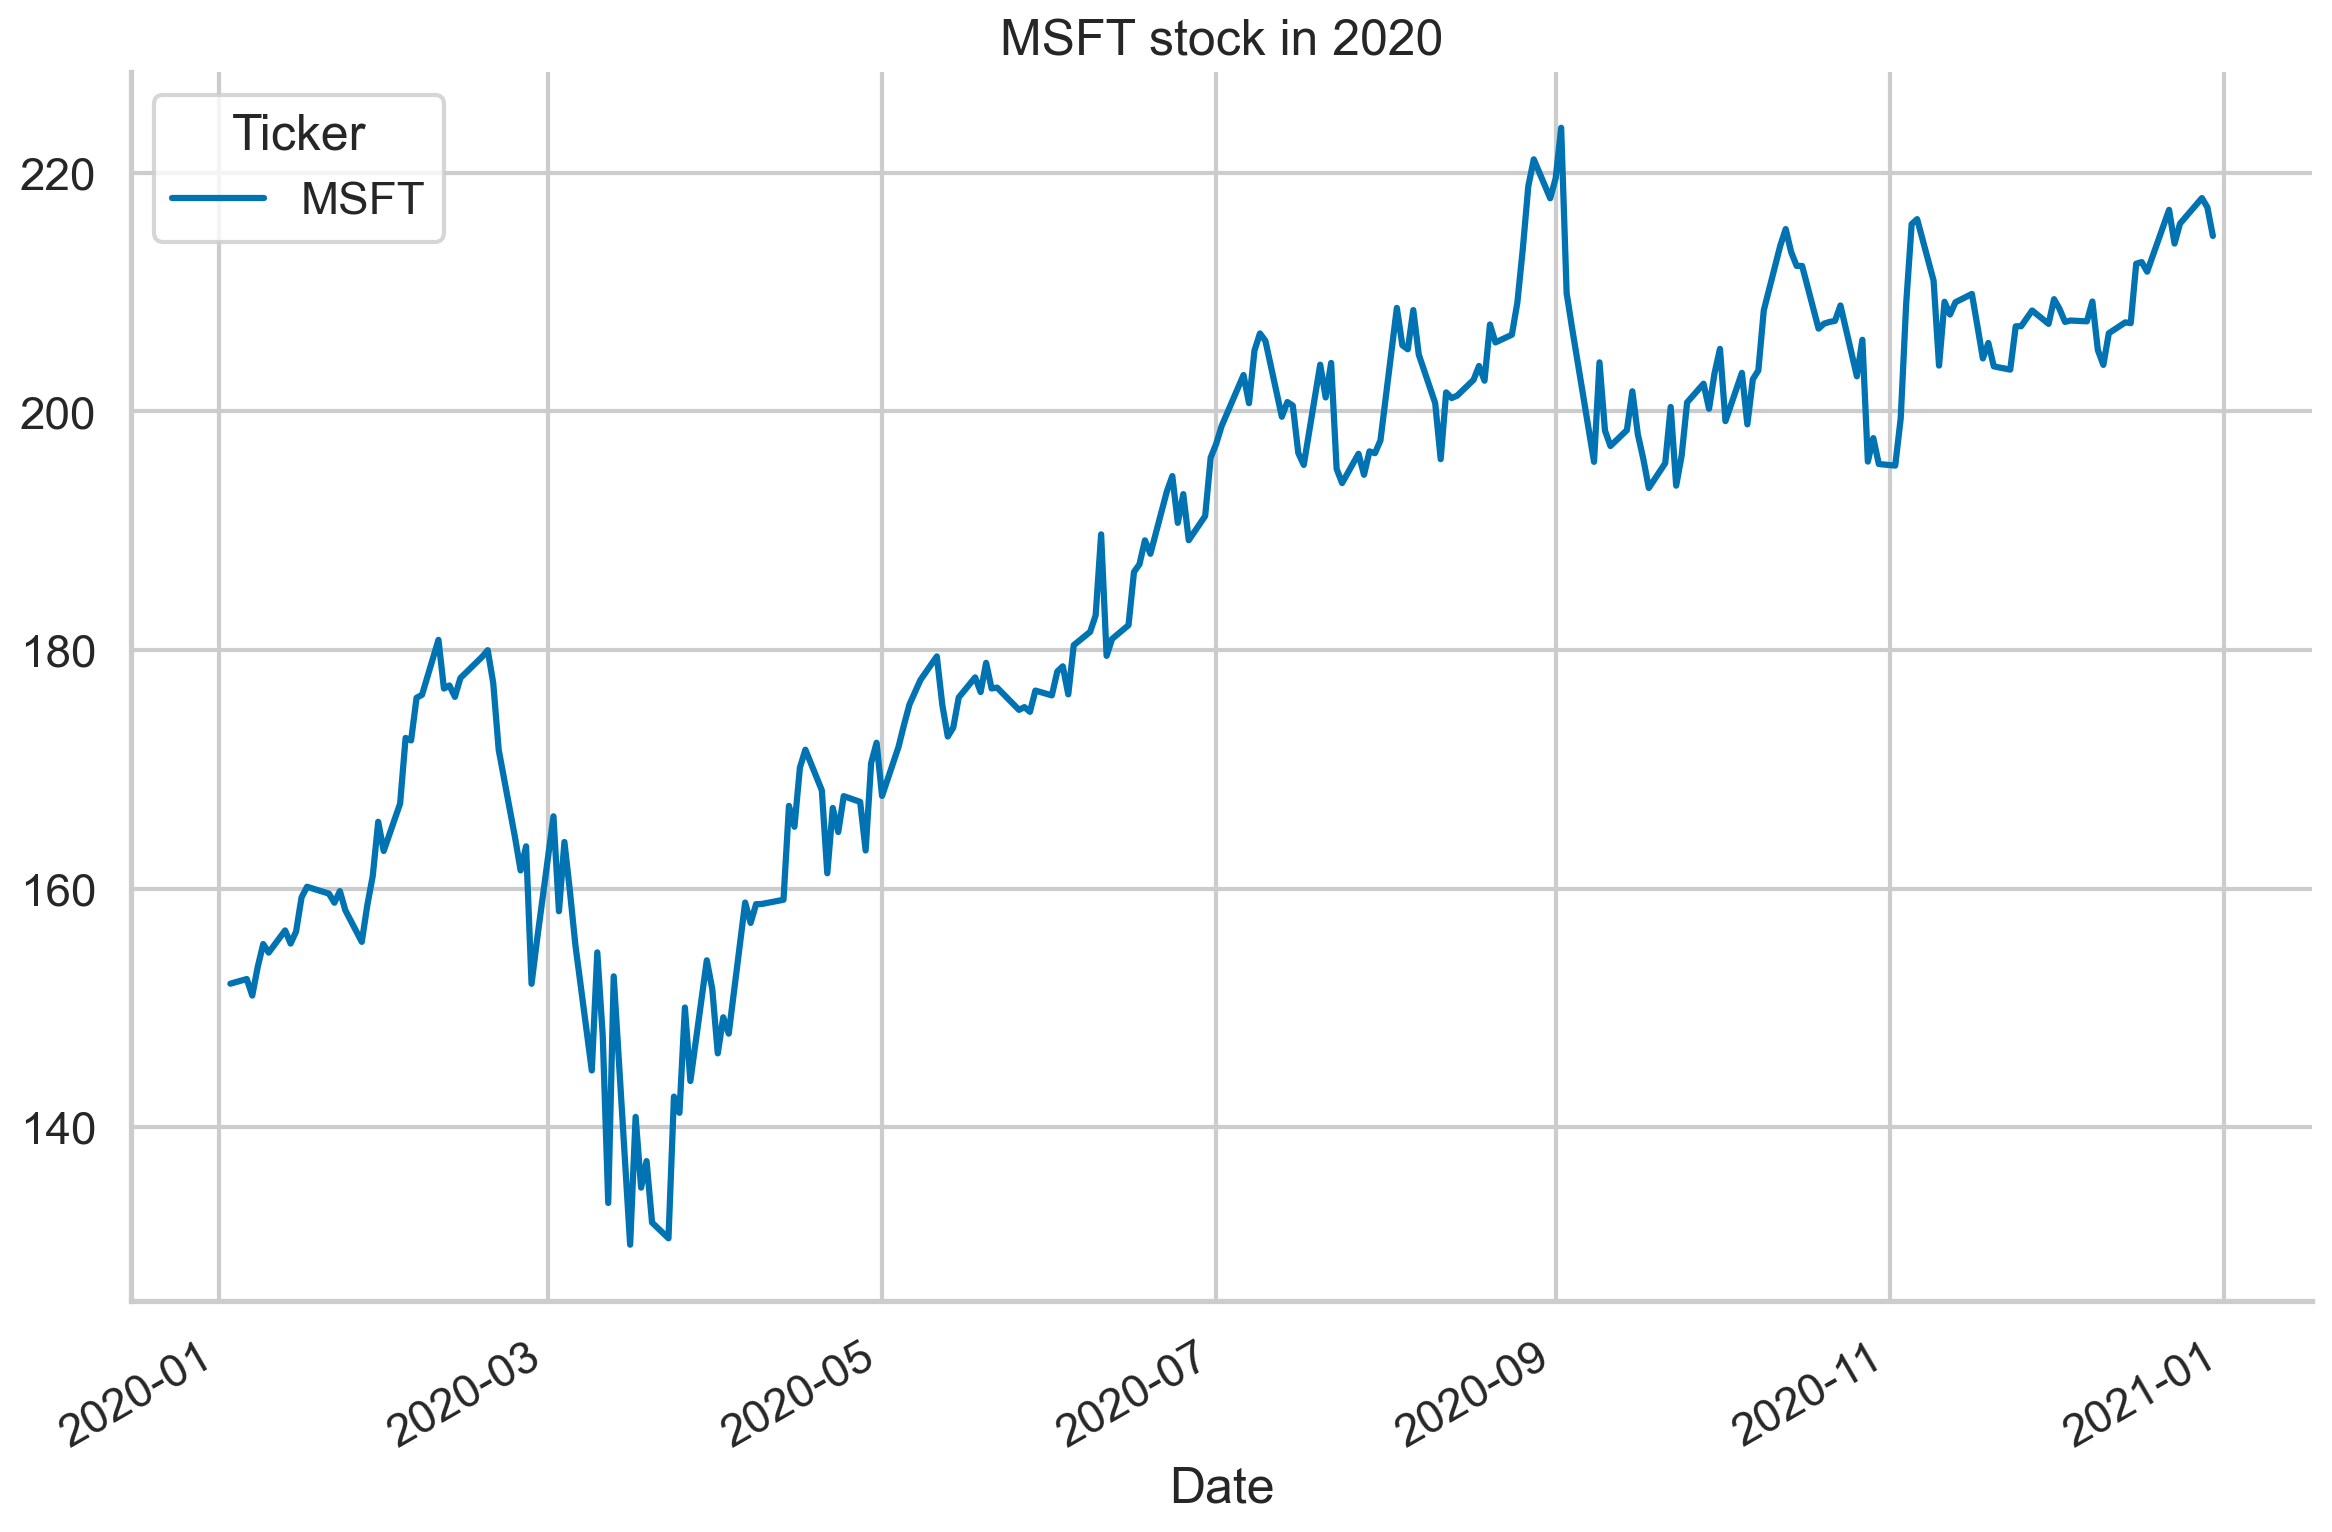

In [6]:
df.plot.line(y="Adj Close", title="MSFT stock in 2020");

sns.despine()
plt.tight_layout()

4. Plot the adjusted close prices and simple returns in one plot:

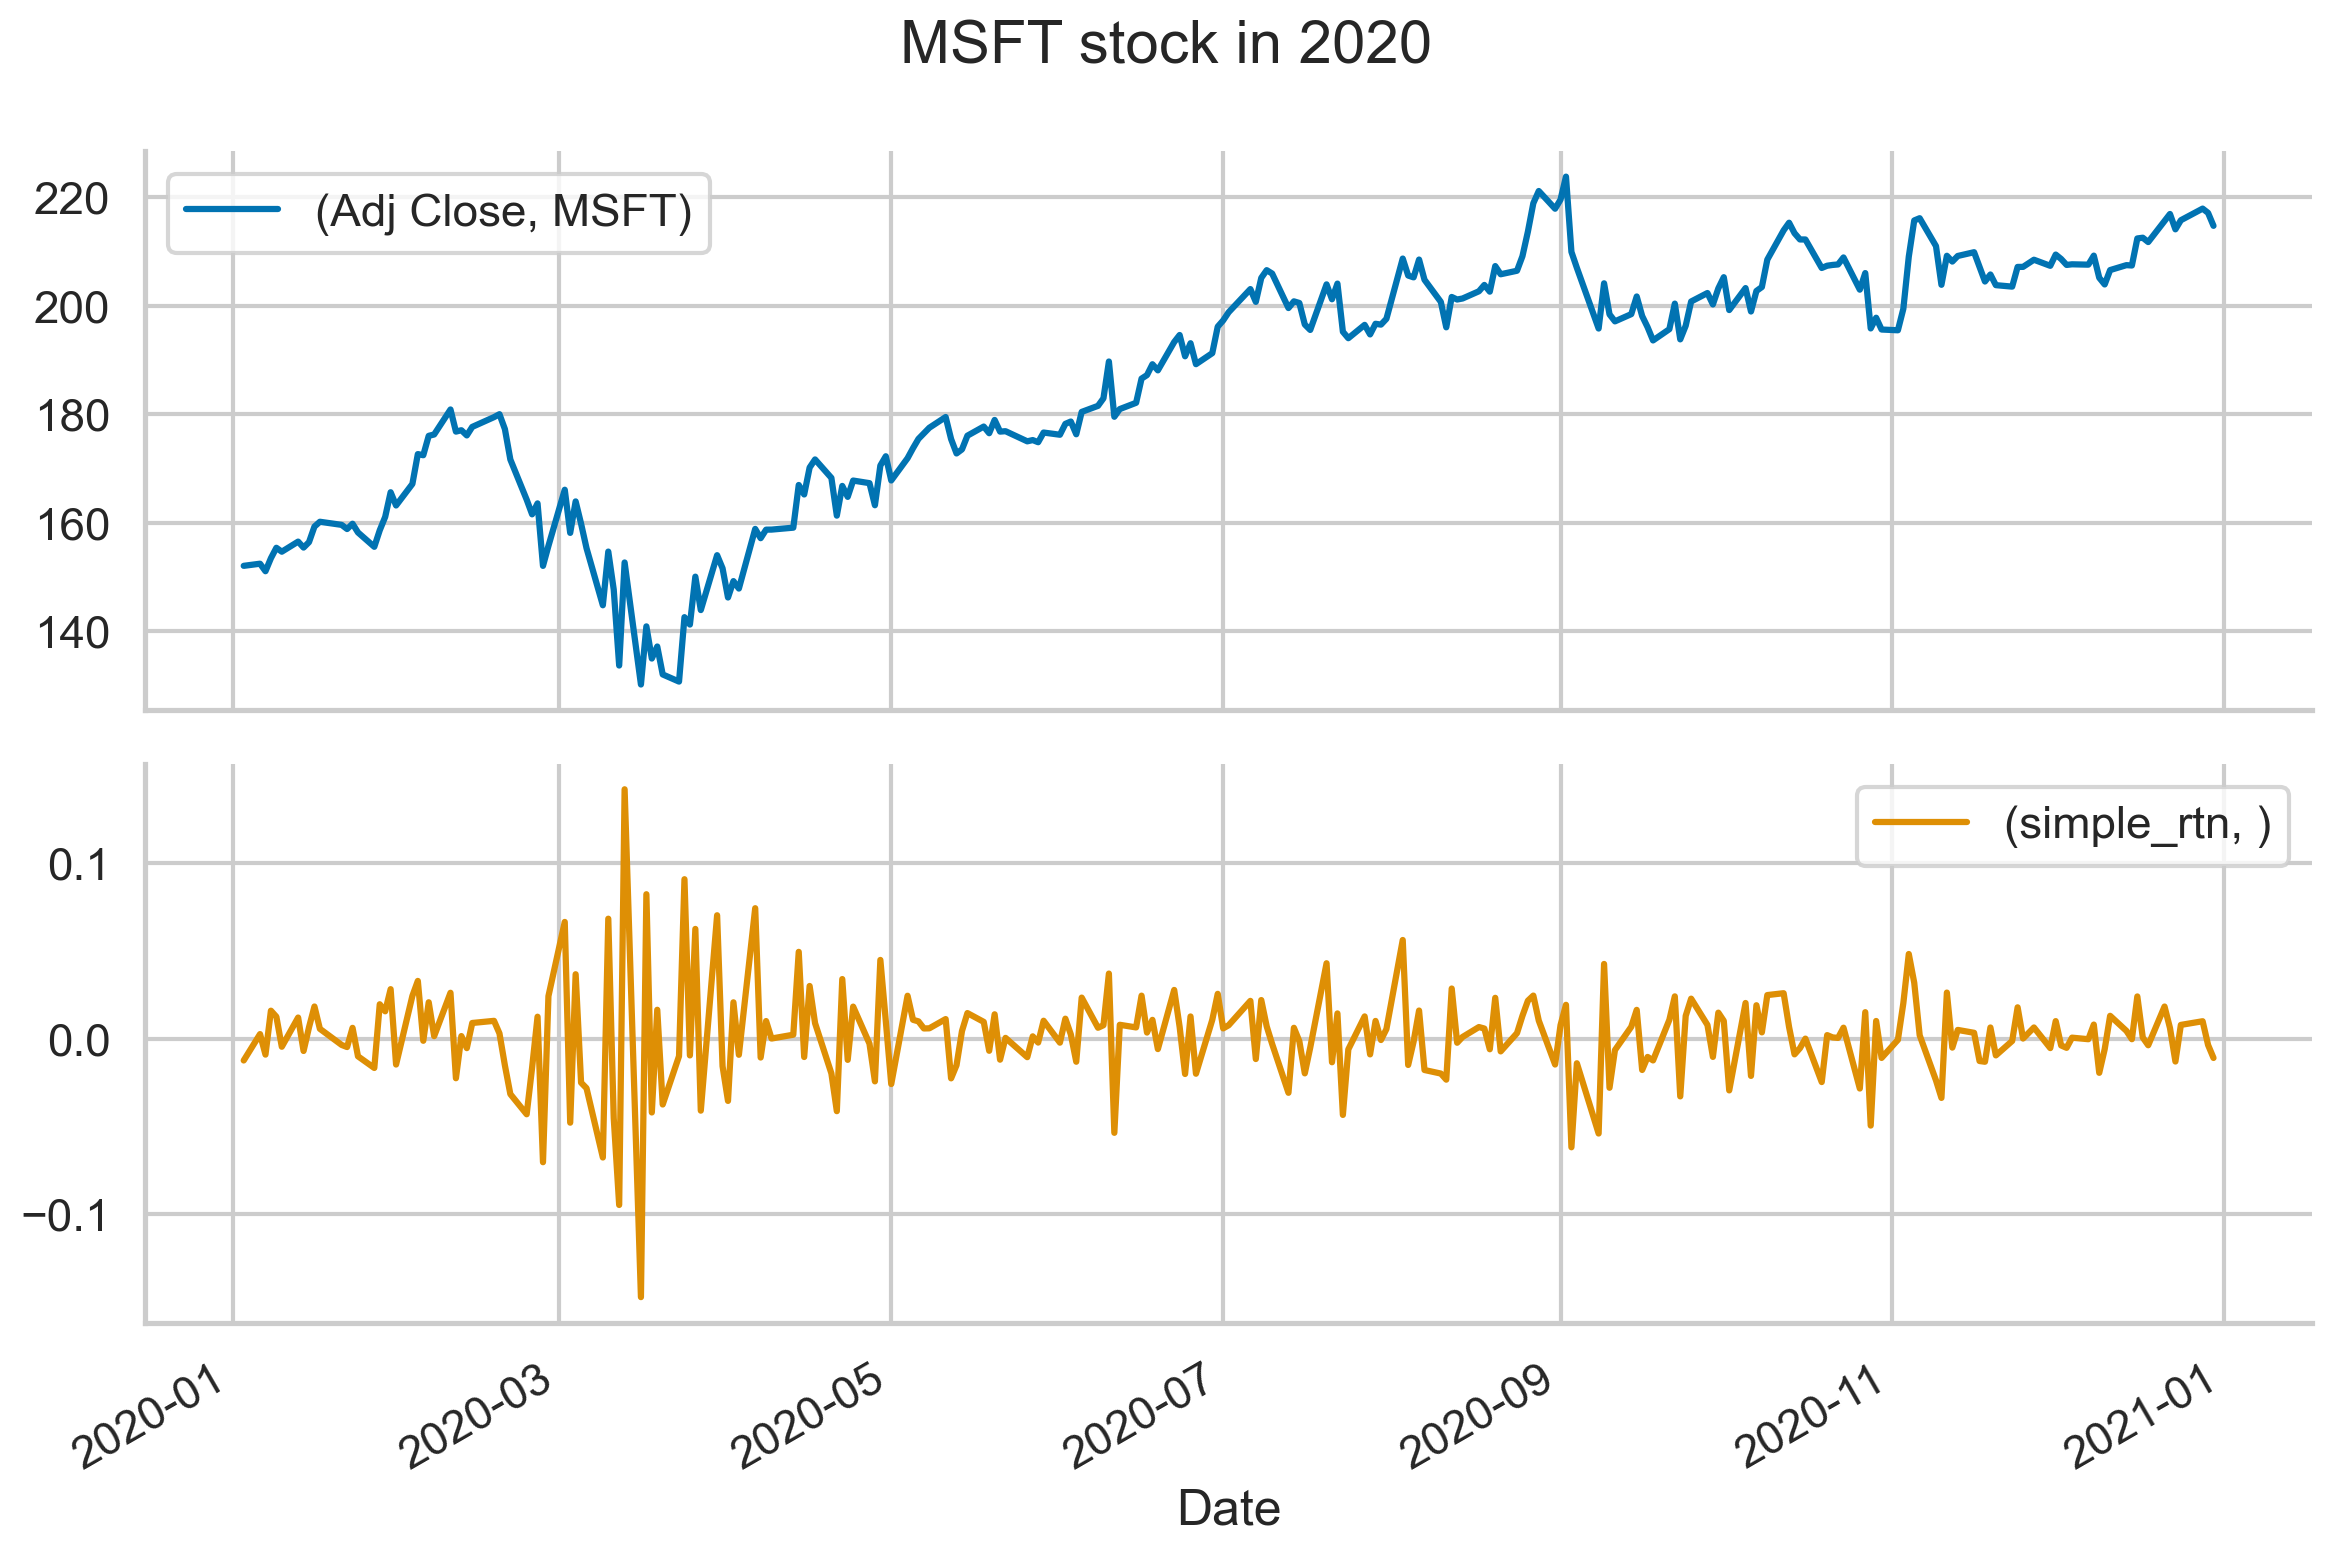

In [7]:
(
    df[["Adj Close", "simple_rtn"]]
    .plot(subplots=True, sharex=True, 
          title="MSFT stock in 2020")
);

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_2', dpi=200)

### There's more

1. Create a similar plot to the previous one using `matplotlib`'s object-oriented interface:

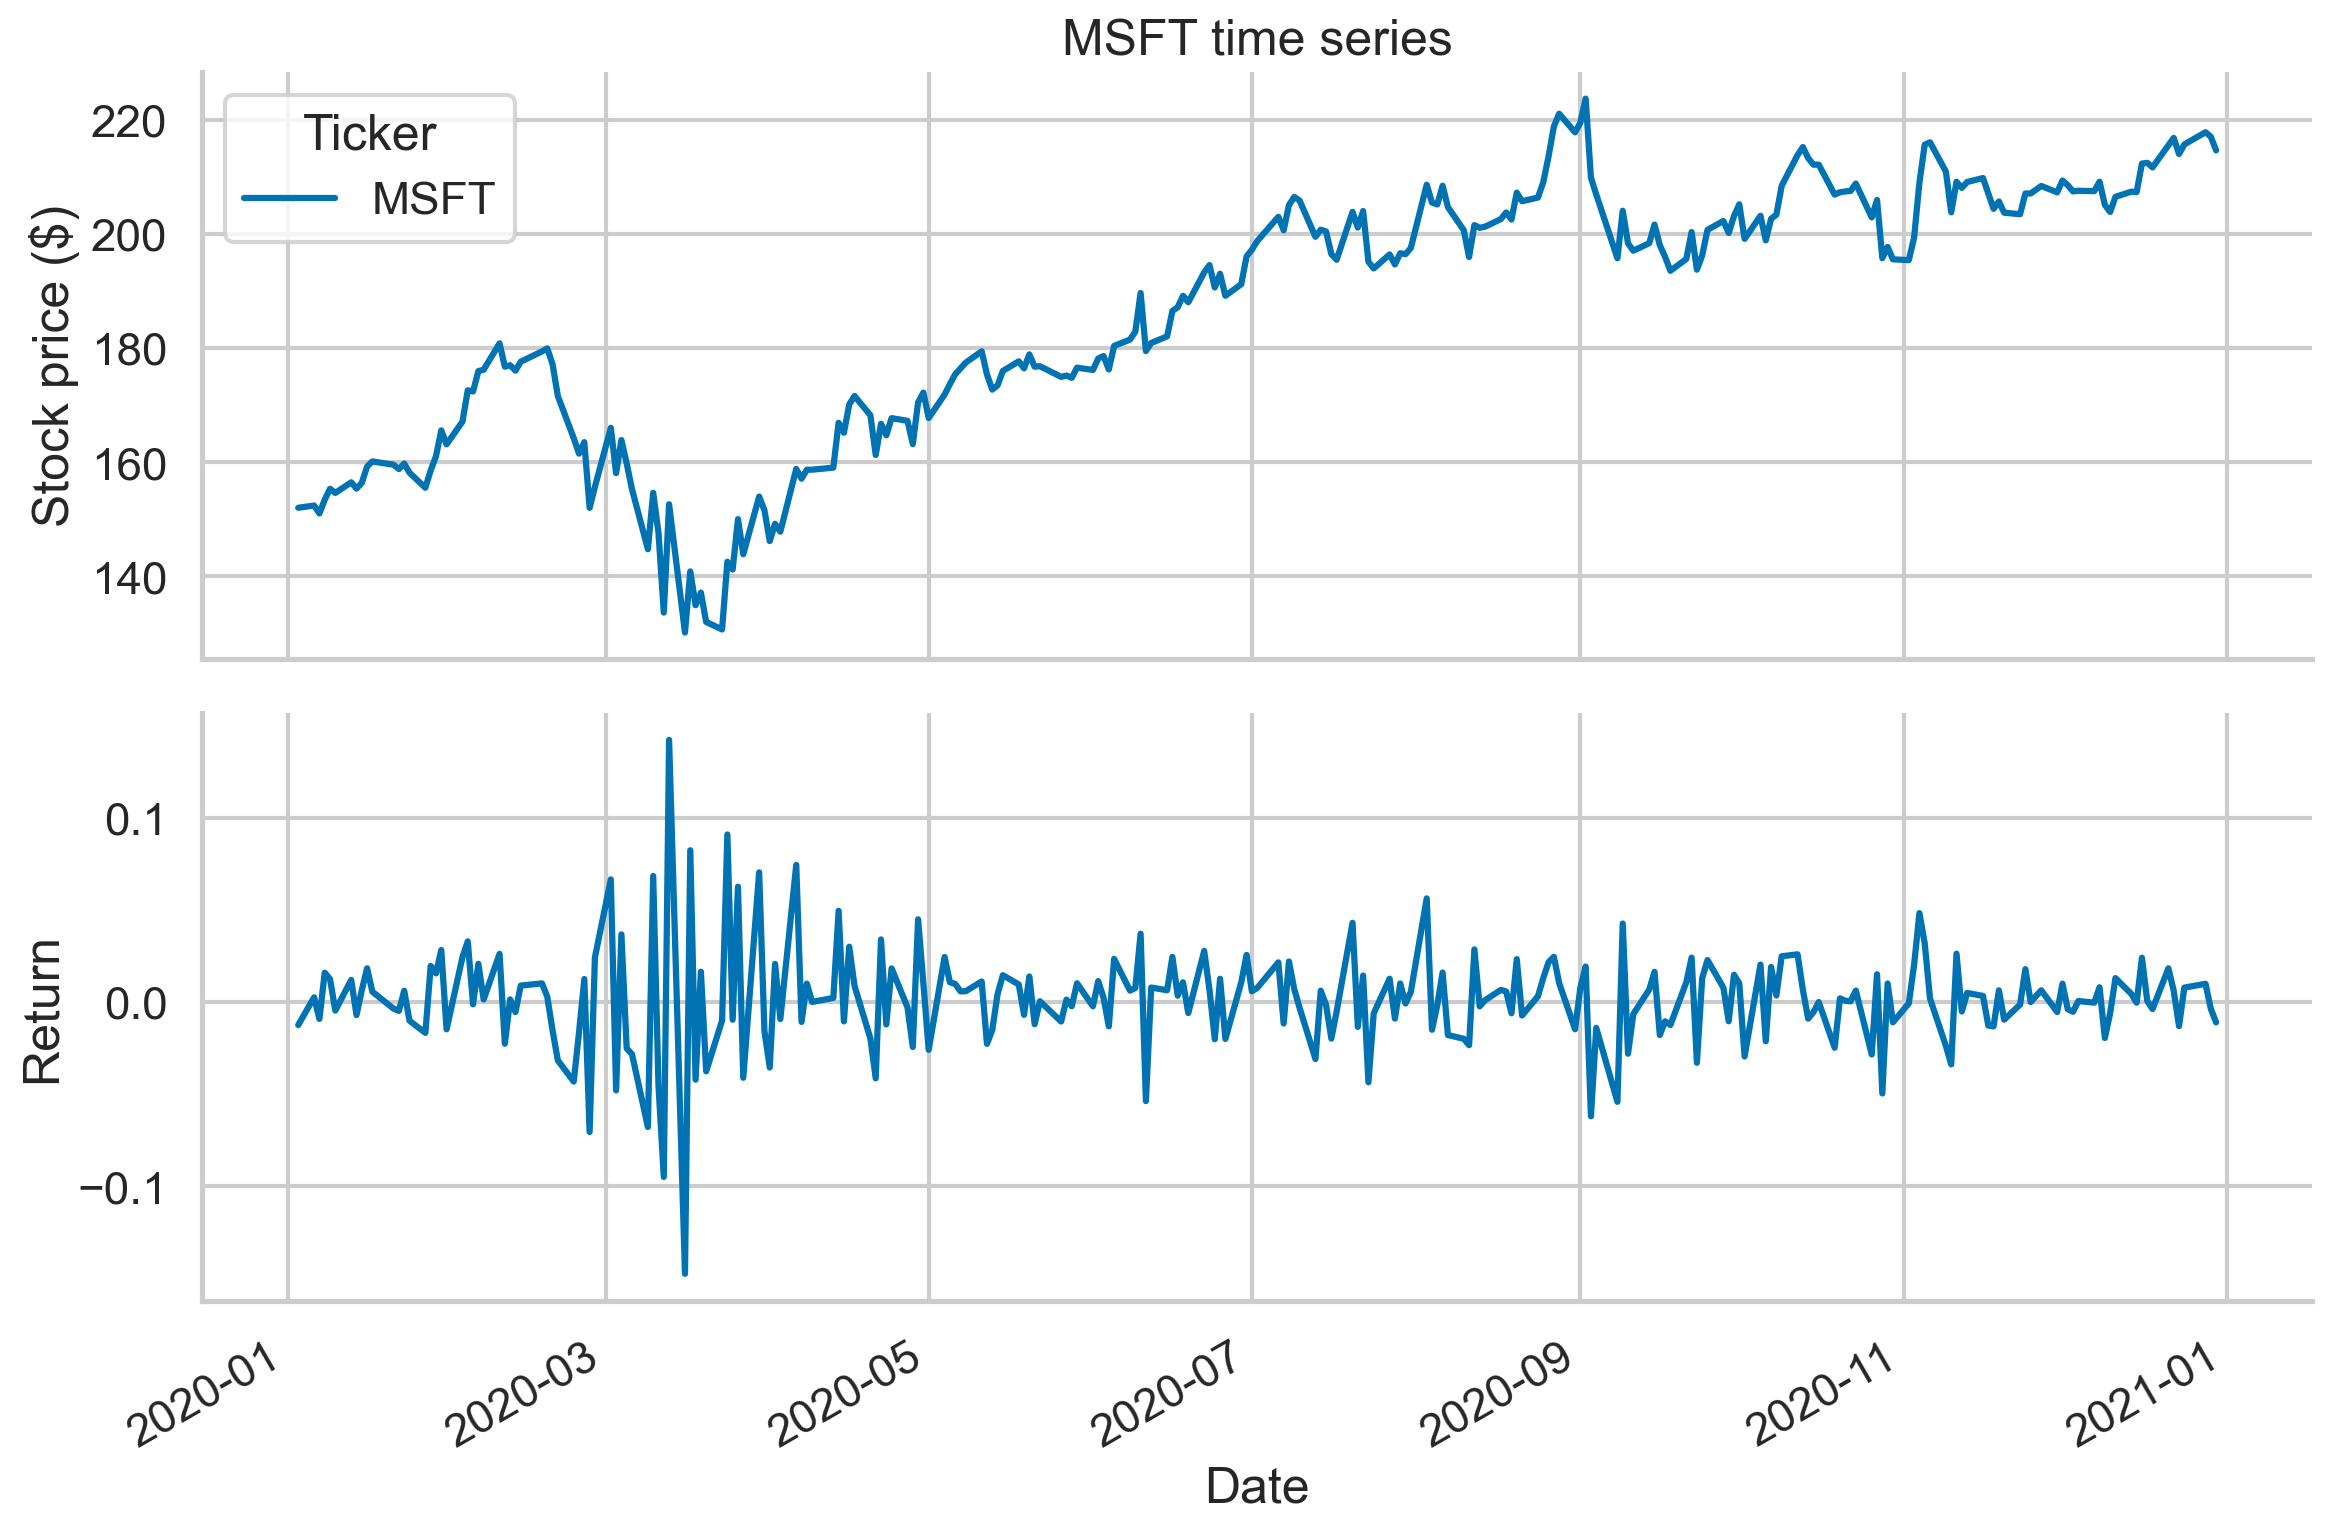

In [8]:
fig, ax = plt.subplots(2, 1, sharex=True)

# add prices
df["Adj Close"].plot(ax=ax[0])
ax[0].set(title="MSFT time series",
          ylabel="Stock price ($)")
    
# add volume
df["simple_rtn"].plot(ax=ax[1])
ax[1].set(ylabel="Return")

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_3', dpi=200)

2. Change the plotting backend of `pandas` to `plotly`:

In [12]:
df["Adj Close"].plot(title="MSFT stock in 2020", backend="plotly")

In [10]:
# df["Adj Close"].plot(backend="altair")

## 3.2 Visualizing seasonal patterns

### How to do it...

1. Import the libraries and authenticate:

In [11]:
import pandas as pd
import nasdaqdatalink
import seaborn as sns 

nasdaqdatalink.ApiConfig.api_key = "YOUR_KEY_HERE"

ModuleNotFoundError: No module named 'nasdaqdatalink'

2. Download and display unemployment data from Nasdaq Data Link:

In [ ]:
df = (
    nasdaqdatalink.get(dataset="FRED/UNRATENSA", 
                       start_date="2014-01-01", 
                       end_date="2019-12-31")
    .rename(columns={"Value": "unemp_rate"})
)
df.head()

,unemp_rate
Date,
2014-01-01,7.0
2014-02-01,7.0
2014-03-01,6.8
2014-04-01,5.9
2014-05-01,6.1


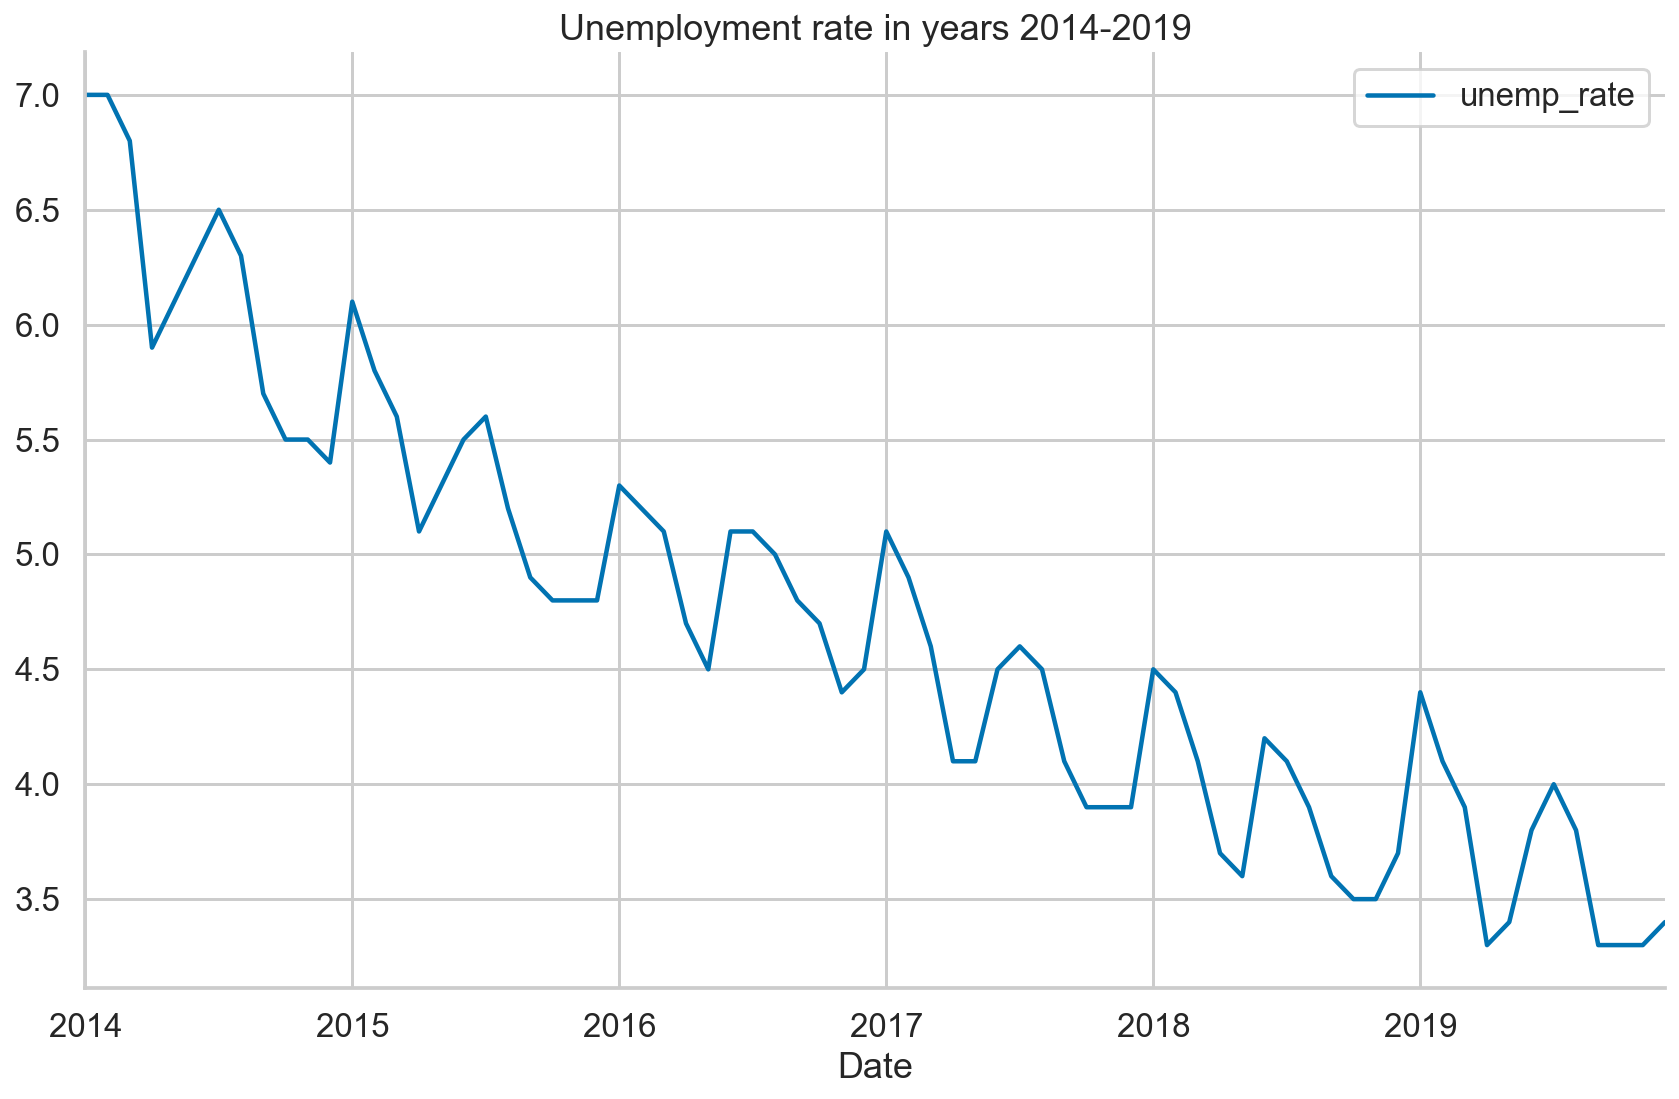

In [ ]:
df.plot(title="Unemployment rate in years 2014-2019");
sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_6', dpi=200)

3. Create new columns with year and month:

In [ ]:
df["year"] = df.index.year
df["month"] = df.index.strftime("%b")

4. Create the seasonal plot:

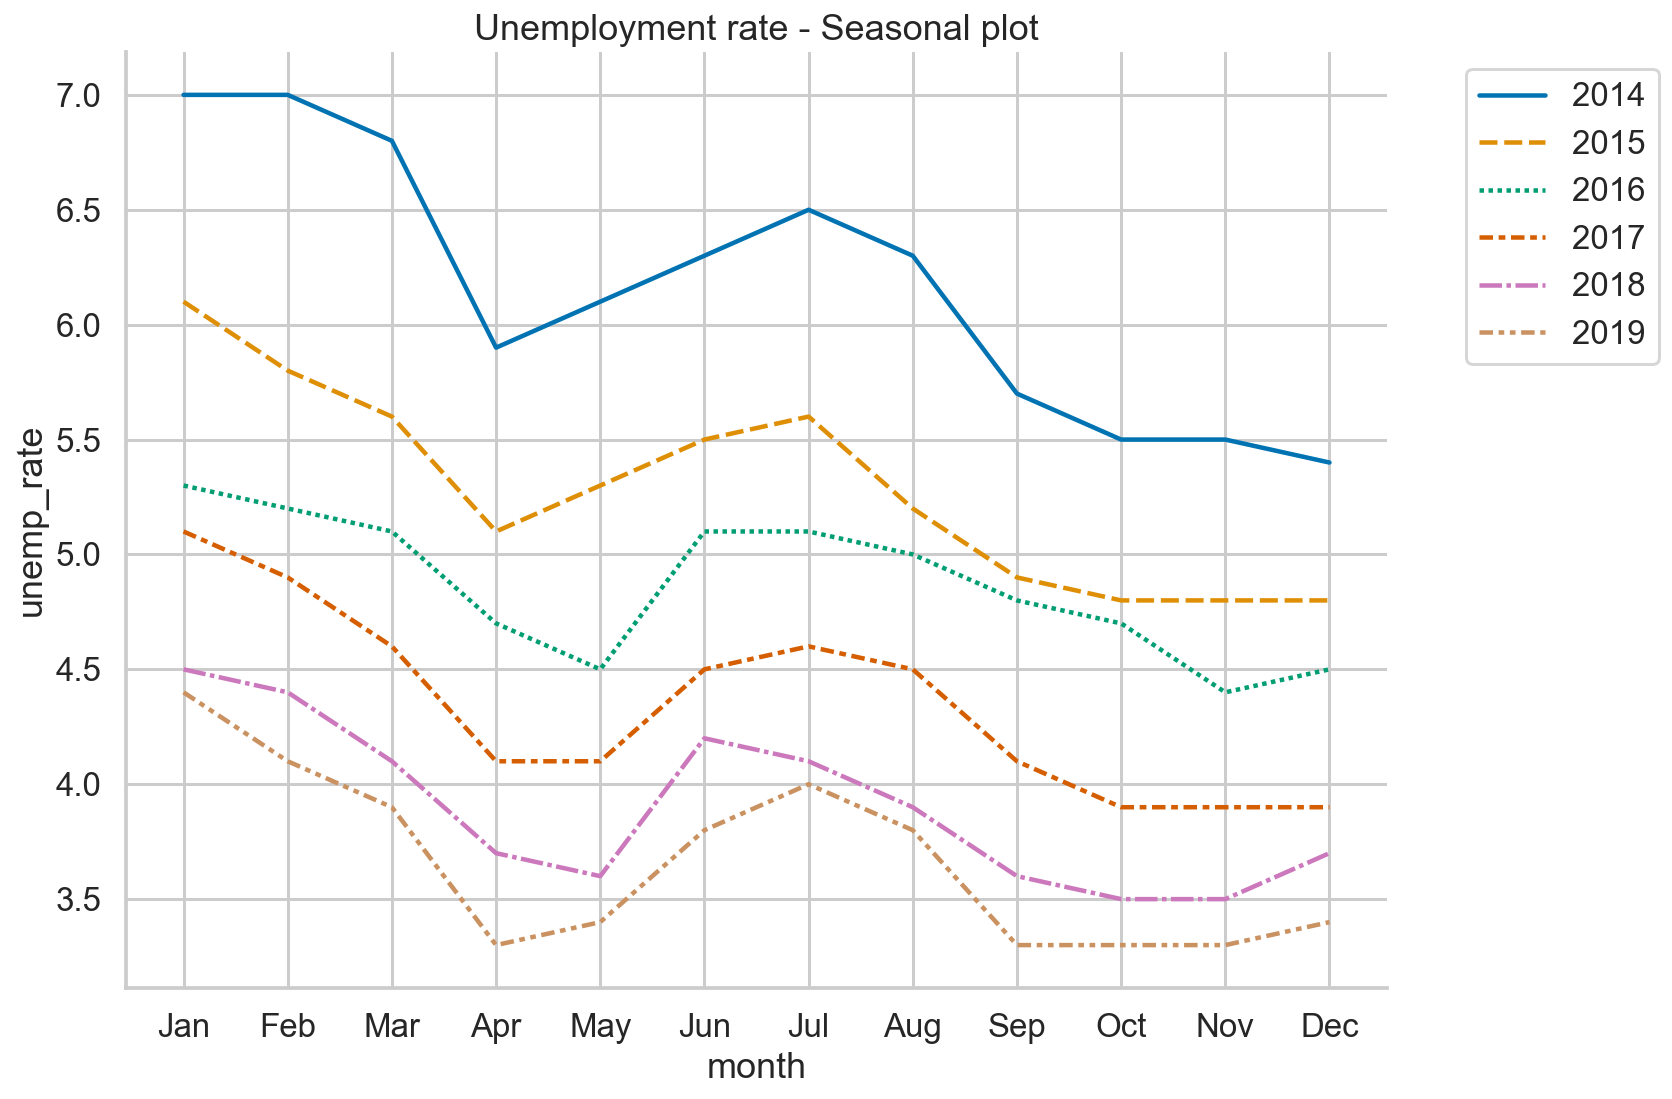

In [ ]:
sns.lineplot(data=df, 
             x="month", 
             y="unemp_rate", 
             hue="year",
             style="year", 
             legend="full",
             palette="colorblind")

plt.title("Unemployment rate - Seasonal plot")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_7', dpi=200)

### There's more

1. Import the libraries:

In [ ]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
import plotly.express as px

2. Create a month plot:

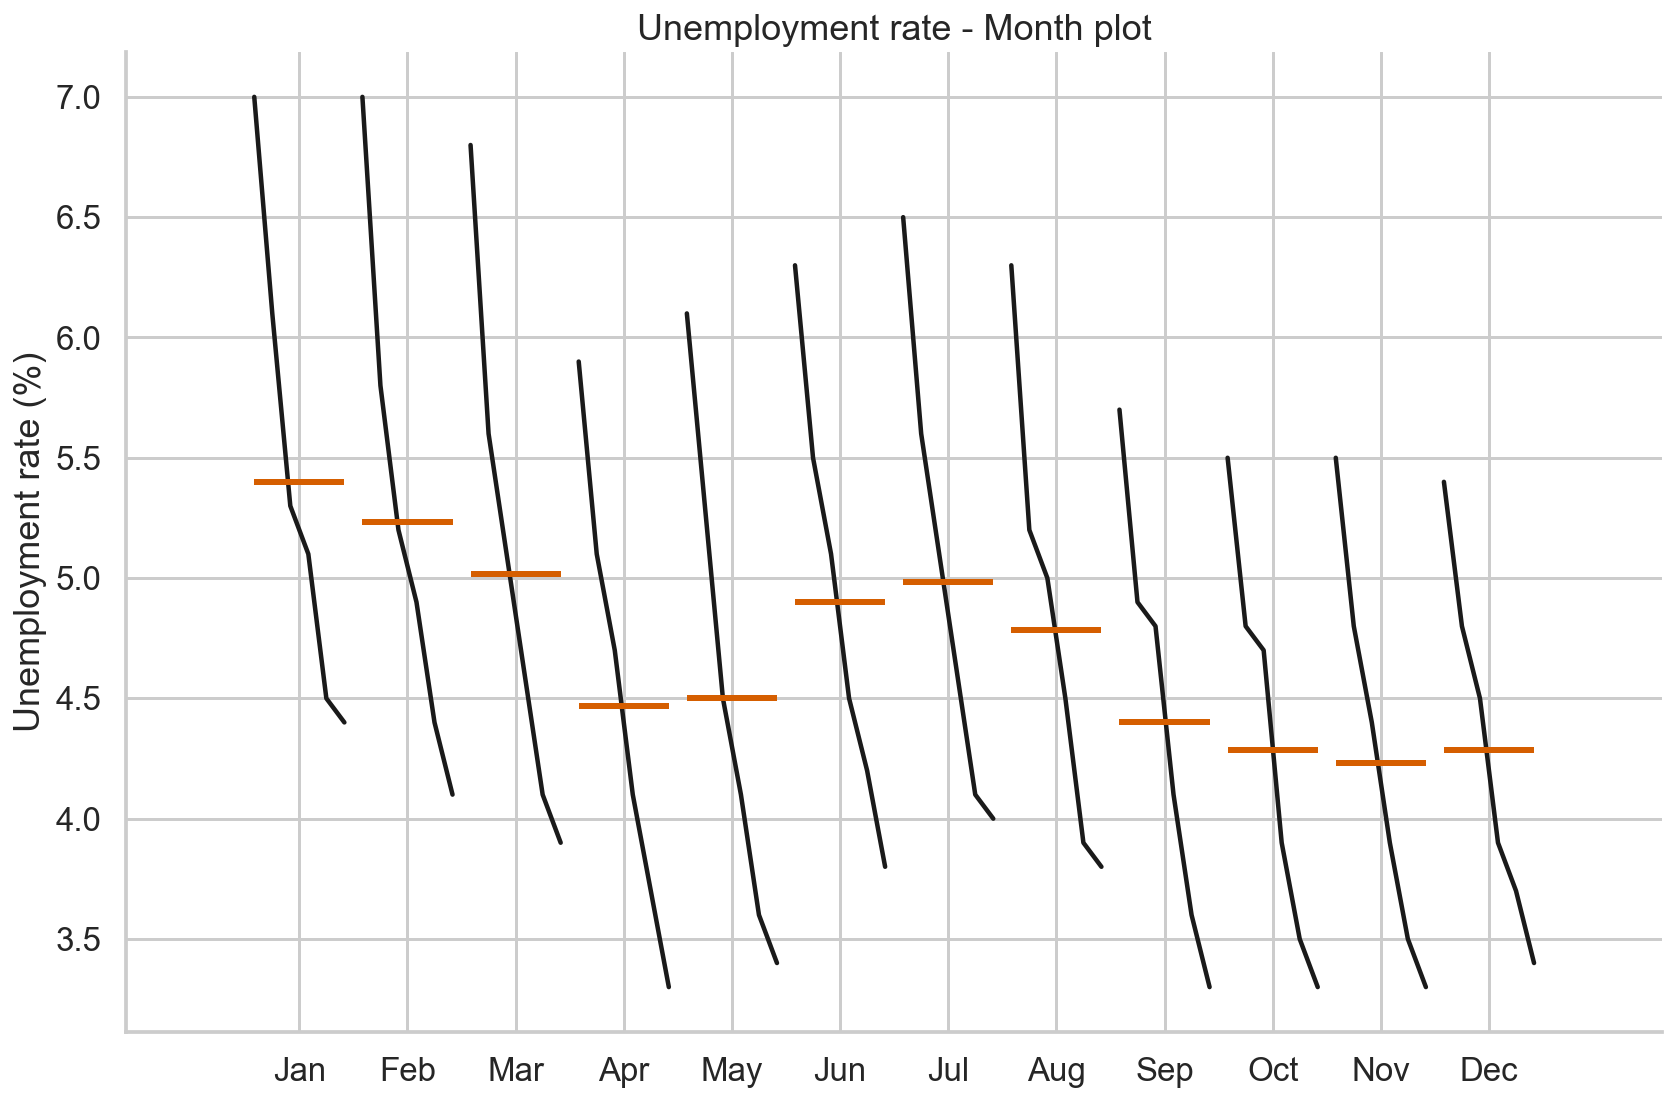

In [ ]:
month_plot(df["unemp_rate"], ylabel="Unemployment rate (%)")
plt.title("Unemployment rate - Month plot");

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_8', dpi=200)

3. Create a quarter plot:

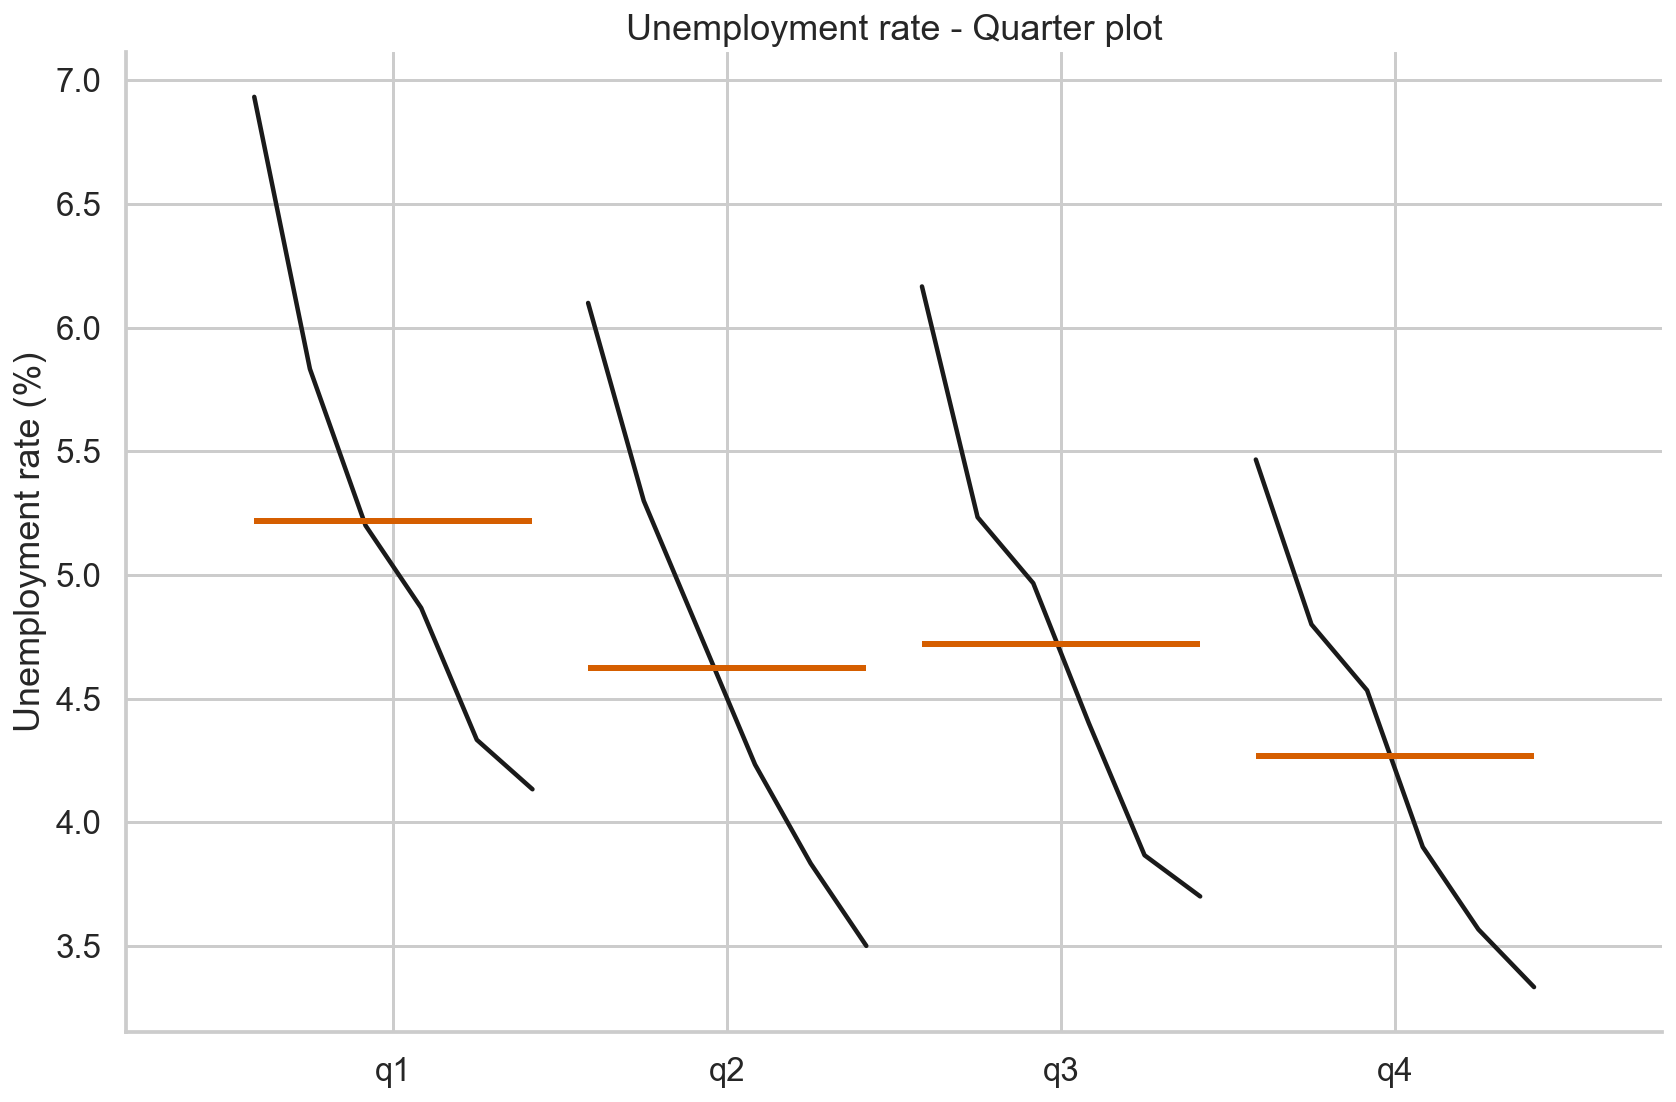

In [ ]:
quarter_plot(df["unemp_rate"].resample("Q").mean(), 
             ylabel="Unemployment rate (%)")
plt.title("Unemployment rate - Quarter plot");

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_9', dpi=200)

4. Create a polar seasonal plot using `plotly.express`:

In [ ]:
fig = px.line_polar(
    df, r="unemp_rate", theta="month", 
    color="year", line_close=True, 
    title="Unemployment rate - Polar seasonal plot",
    width=600, height=500,
    range_r=[3, 7]
)

fig.show()

## 3.3 Creating interactive visualizations 

1. Import the libraries and initialize Notebook display:

In [ ]:
import pandas as pd 
import yfinance as yf

import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas_bokeh

cf.go_offline()
# initialize notebook display
pandas_bokeh.output_notebook()

Loading BokehJS ...

2. Download Microsoft's stock prices from 2020 and calculate simple returns:

In [ ]:
df = yf.download("MSFT",
                 start="2020-01-01", 
                 end="2020-12-31",
                 auto_adjust = False, 
                 progress=False)

df["simple_rtn"] = df["Adj Close"].pct_change()
df = df.loc[:, ["Adj Close", "simple_rtn"]].dropna()
df = df.dropna()

3. Create the plot using `cufflinks`:

In [ ]:
df.iplot(subplots=True, shape=(2,1), 
         shared_xaxes=True, 
         title="MSFT time series")

4. Create the plot using `bokeh`:

In [ ]:
df["Adj Close"].plot_bokeh(kind="line", 
                           rangetool=True, 
                           title="MSFT time series");


5. Create the plot using `plotly.express`:

In [ ]:
fig = px.line(data_frame=df, 
              y="Adj Close", 
              title="MSFT time series")
fig.show()

### There's more

1. Import the libraries:

In [ ]:
from datetime import date

2. Define the annotations for the `plotly` plot:

In [ ]:
selected_date_1 = date(2020, 2, 19)
selected_date_2 = date(2020, 3, 23)

selected_y_1 = (
    df
    .query(f"index == '{selected_date_1}'")
    .loc[:, "Adj Close"]
    .squeeze()
)
selected_y_2 = (
    df
    .query(f"index == '{selected_date_2}'")
    .loc[:, "Adj Close"]
    .squeeze()
)

first_annotation = {
    "x": selected_date_1,
    "y": selected_y_1,
    "arrowhead": 5,
    "text": "COVID decline starting",
    "font": {"size": 15, "color": "red"},
}

second_annotation = {
    "x": selected_date_2,
    "y": selected_y_2,
    "arrowhead": 5,
    "text": "COVID recovery starting",
    "font": {"size": 15, "color": "green"},
    "ax": 150,
    "ay": 10
}

3. Update the layout of the plot and show it:

In [ ]:
fig.update_layout(
    {"annotations": [first_annotation, second_annotation]}
)
fig.show()

## 3.4 Creating a candlestick chart

### Getting ready

1. Import the libraries:

In [ ]:
import pandas as pd 
import yfinance as yf

2. Download the adjusted prices from Yahoo Finance:

In [ ]:
df = yf.download("TWTR", 
                 start="2018-01-01", 
                 end="2018-12-31",
                 progress=False,
                 auto_adjust=True)

### How to do it...

1. Import the libraries:

In [ ]:
import cufflinks as cf
from plotly.offline import iplot

cf.go_offline()

As an alternative to running `cf.go_offline()` every time, we can also modify the settings to always use the offline mode by running: `cf.set_config_file(offline=True)`. We can then view the settings using `cf.get_config_file()`.

In [ ]:
cf.set_config_file(offline=False)

In [ ]:
cf.get_config_file()

{'sharing': 'public',
 'theme': 'pearl',
 'colorscale': 'dflt',
 'offline': False,
 'offline_connected': True,
 'offline_url': '',
 'offline_show_link': True,
 'offline_link_text': 'Export to plot.ly',
 'datagen_mode': 'stocks',
 'dimensions': None,
 'margin': None,
 'offline_config': None}

2. Create the candlestick chart using Twitter's stock prices:

In [ ]:
qf = cf.QuantFig(
    df, title="Twitter's Stock Price", 
    legend="top", name="Twitter's stock prices in 2018"
)

3. Add volume and moving averages to the figure:

In [ ]:
qf.add_volume()
qf.add_sma(periods=20, column="Close", color="red")
qf.add_ema(periods=20, color="green") 

4. Display the plot:

In [ ]:
qf.iplot()

### There's more

1. Import the libraries:

In [ ]:
import plotly.graph_objects as go
import mplfinance as mpf

2. Create a candlestick chart using `plotly`:

In [ ]:
fig = go.Figure(data=
    go.Candlestick(x=df.index,
                   open=df["Open"],
                   high=df["High"],
                   low=df["Low"],
                   close=df["Close"])
)

fig.update_layout(
    title="Twitter's stock prices in 2018",
    yaxis_title="Price ($)"
)

fig.show()

3. Create a candlestick chart using `mplfinance`:

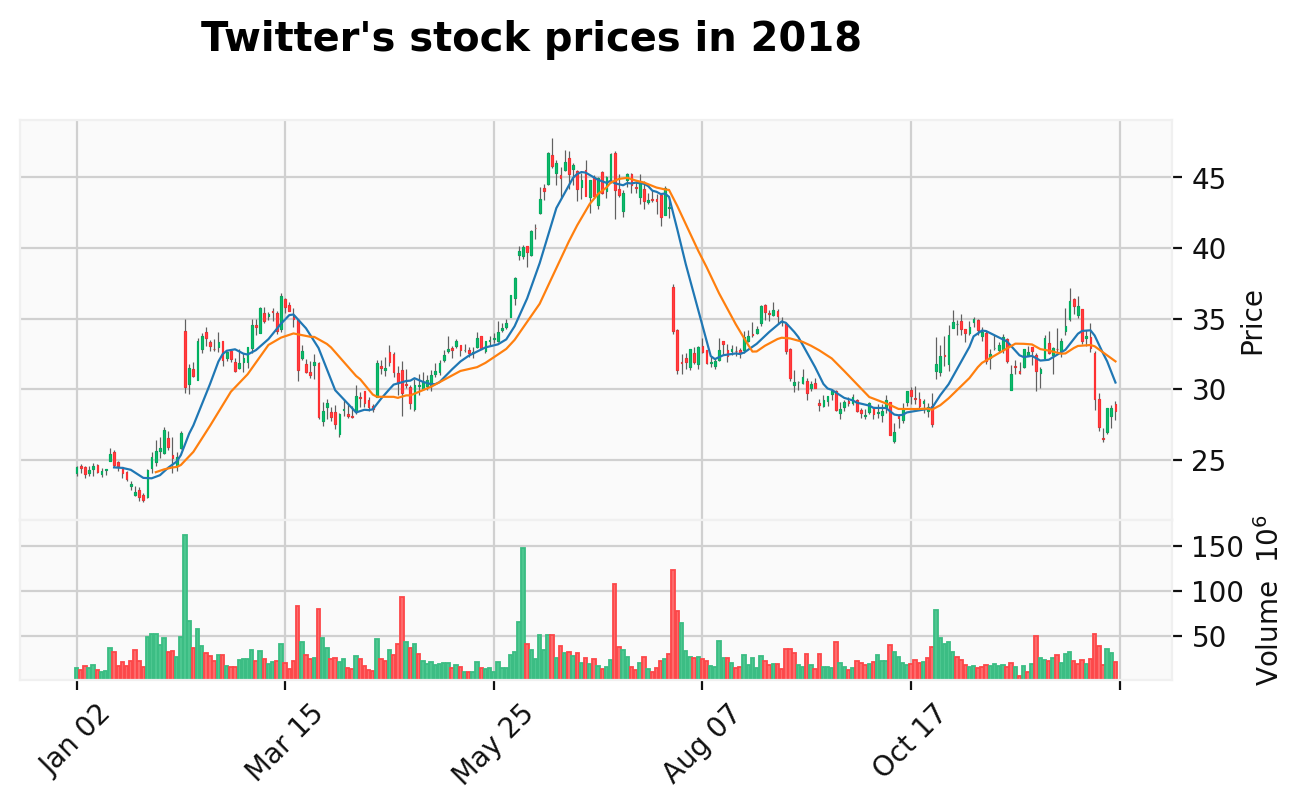

<Figure size 640x480 with 0 Axes>

In [ ]:
mpf.plot(df, type="candle", 
         mav=(10, 20), 
         volume=True, 
         style="yahoo", 
         title="Twitter's stock prices in 2018", 
         figsize=(8, 4));

sns.despine()
plt.tight_layout()